<a href="https://colab.research.google.com/github/MichaelSousa01/Data.py/blob/main/temperatura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelo de previsão de temperaturas

Desafio:Você trabalha como cientista de dados em uma empresa de meteorologia que coleta dados diários de temperatura ao longo dos anos. O objetivo da empresa é prever a temperatura de amanhã com base nas temperaturas anteriores, para fornecer uma previsão mais precisa. Para isso, você decide usar uma rede neural do tipo LSTM (Long Short-Term Memory), que é adequada para lidar com dados sequenciais.

Seu objetivo nesta oficina é construir um modelo de deep learning utilizando uma rede neural LSTM que possa prever a temperatura do dia seguinte com base nas temperaturas dos últimos 30 dias.

Para facilitar, vou usar um conjunto de dados fictício de temperaturas médias diárias. Vamos criar um conjunto de dados fictício de temperaturas para os últimos 100 dia.

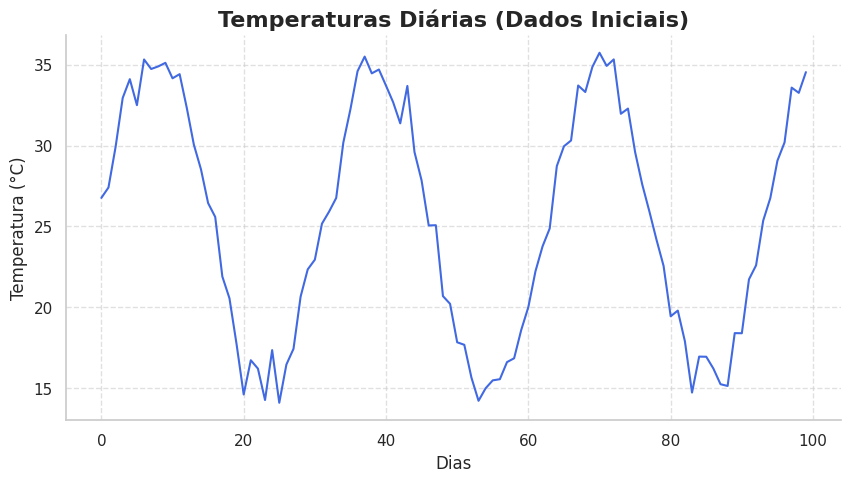

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_21 (LSTM)                  │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3240
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.3413
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2444
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.1706
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1115
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.1154
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0918
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0928
Epoch 9/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0890
Epoch 10/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0844
Epoch 11/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0829
Epoch 12/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0742
Epoch 13/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0774
Epoch 14/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0641
Epoch 15/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0499
Epoch 16/20
5/5 ━━━━━━━━━━━━━━━━━━

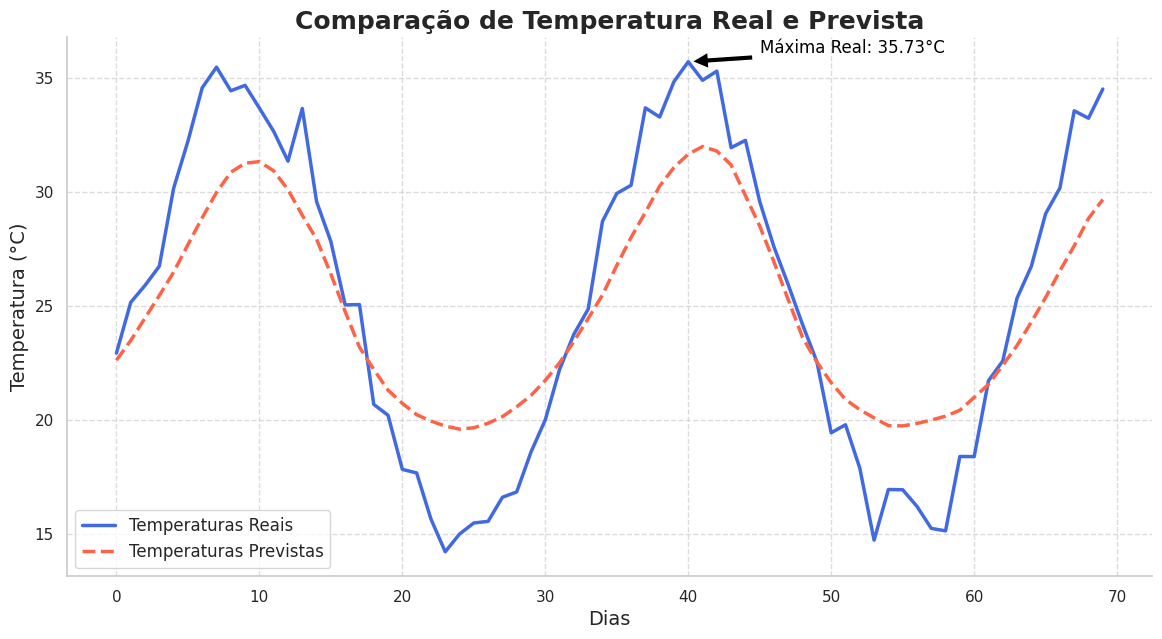

In [ ]:
#Passo 1: Importando bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# Passo 2: Gerar dados fictícios
np.random.seed(0)
data = np.sin(np.linspace(0, 20, 100)) * 10 + 25 + np.random.normal(0, 1, 100)

# Criar o DataFrame
df = pd.DataFrame(data, columns=["Temperatura"])

# Visualizar os dados iniciais
plt.figure(figsize=(10,5))
plt.plot(df, color='royalblue')
plt.title("Temperaturas Diárias (Dados Iniciais)", fontsize=16, fontweight='bold')
plt.xlabel("Dias", fontsize=12)
plt.ylabel("Temperatura (°C)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
sns.despine()
plt.show()

# Passo 3: Pré-processamento dos dados

# Normalizando os dados entre 0 e 1
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

# Função para criar janelas de 30 dias
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)

# Criando sequências
window_size = 30
X, y = create_sequences(scaled_data, window_size)

# Ajustando o formato para LSTM: (amostras, timesteps, features)
X = X.reshape((X.shape[0], X.shape[1], 1))

# Passo 4: Construção da Rede LSTM

# Criando o modelo
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(30, 1)))
model.add(Dense(1))

# Compilando
model.compile(optimizer='adam', loss='mean_squared_error')

# Resumo do modelo
model.summary()

# Treinamento
history = model.fit(X, y, epochs=20, batch_size=16)

# Passo 5: Avaliação e Previsão

# Previsão
predicted_temperatures = model.predict(X)

# Invertendo a normalização para comparar com valores reais
predicted_temperatures = scaler.inverse_transform(predicted_temperatures)
real_temperatures = scaler.inverse_transform(y.reshape(-1, 1))

# Passo 6: Plotando resultados de forma mais bonita

# Aplicando estilo
sns.set(style="whitegrid")

# Criando a figura
plt.figure(figsize=(14, 7))
plt.plot(real_temperatures, label='Temperaturas Reais', color='royalblue', linewidth=2.5, linestyle='-')
plt.plot(predicted_temperatures, label='Temperaturas Previstas', color='tomato', linewidth=2.5, linestyle='--')

# Título e labels
plt.title('Comparação de Temperatura Real e Prevista', fontsize=18, fontweight='bold')
plt.xlabel('Dias', fontsize=14)
plt.ylabel('Temperatura (°C)', fontsize=14)

# Grid e bordas
plt.grid(True, linestyle='--', alpha=0.7)
sns.despine()

# Legenda
plt.legend(fontsize=12, loc='lower left')

# Passo 7: Anotações no gráfico
max_real_idx = np.argmax(real_temperatures)
max_real_value = real_temperatures[max_real_idx]

plt.annotate(f'Máxima Real: {max_real_value[0]:.2f}°C',
             xy=(max_real_idx, max_real_value),
             xytext=(max_real_idx + 5, max_real_value + 1),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=12, color='black', horizontalalignment='left', verticalalignment='top')


# Mostrar ele
plt.show()
# Passo 8: Salvando o gráfico
#plt.savefig('grafico_temperaturas.png', dpi=300, bbox_inches='tight')

#print("Gráfico salvo como 'grafico_temperaturas.png' na mesma pasta do seu projeto.")
